<div class="alert alert-info">

   
**Principal Component Analysis (PCA)**
</div>

Using principal component analysis. Each car is described by 25 variables. The dataset contains six types of cars and we would like to understand how they are different. Aim of this project:  

- explore high-dimensional data with many variables
- compute and interpret PCA
- charactize groups in the PCA plot
- find patterns and outliers in data with many variables


In [34]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bokeh.models import ColumnDataSource, ColorBar, LinearColorMapper, CategoricalColorMapper
from bokeh.models import Arrow, NormalHead, LabelSet, Label
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category10, Category20, Viridis
from bokeh.transform import factor_cmap, linear_cmap
from bokeh.io import export_png
from bokeh.layouts import gridplot, row
from bokeh.core.properties import value
from bokeh.models.tickers import FixedTicker

from math import pi

output_notebook()

Loading BokehJS ...

<div class="alert alert-info">
    
**Load the 1993 cars dataset description:**
</div>

- Manufacturer
- Model
- Type: Small, Sporty, Compact, Midsize, Large, Van
- Minimum Price (in \$1,000) - Price for basic version of this model
- Midrange Price (in \$1,000) - Average of Min and Max prices
- Maximum Price (in \$1,000) - Price for a premium version
- City MPG (miles per gallon by EPA rating)
- Highway MPG
- Air Bags standard 0 = none, 1 = driver only, 2 = driver & passenger
- Drive train type 0 = rear wheel drive 1 = front wheel drive 2 = all wheel drive
- Number of cylinders
- Engine size (liters)
- Horsepower (maximum)
- RPM (revs per minute at maximum horsepower)
- Engine revolutions per mile (in highest gear)
- Manual transmission available 0 = No, 1 = Yes
- Fuel tank capacity (gallons)
- Passenger capacity (persons)
- Length (inches)
- Wheelbase (inches)
- Width (inches)
- U-turn space (feet)
- Rear seat room (inches)
- Luggage capacity (cu. ft.)
- Weight (pounds)
- Domestic? 0 = non-U.S. manufacturer 1 = U.S. manufacturer

In [35]:
cars = pd.read_csv( '93cars.dat.csv', sep='\s+', na_values='*')
cars

Manufacturer    Model     Type  MinPrice  MidPrice  MaxPrice  CityMpg  \
0         Acura  Integra    Small      12.9      15.9      18.8       25   
1         Acura   Legend  Midsize      29.2      33.9      38.7       18   
2          Audi       90  Compact      25.9      29.1      32.3       20   
3          Audi      100  Midsize      30.8      37.7      44.6       19   
4           BMW     535i  Midsize      23.7      30.0      36.2       22   
..          ...      ...      ...       ...       ...       ...      ...   
88   Volkswagen  Eurovan      Van      16.6      19.7      22.7       17   
89   Volkswagen   Passat  Compact      17.6      20.0      22.4       21   
90   Volkswagen  Corrado   Sporty      22.9      23.3      23.7       18   
91        Volvo      240  Compact      21.8      22.7      23.5       21   
92        Volvo      850  Midsize      24.8      26.7      28.5       20   

    HighwayMpg  AirBags  DriveTrainType  ...  Tank  Passenger  Length  \
0           31        0               1  ...  13.2          5     177   
1           25        2               1  ...  18.0          5     195   
2           26        1               1  ...  16.9          5     180   
3           26        2               1  ...  21.1          6     193   
4           30        1               0  ...  21.1          4     186   
..         ...      ...             ...  ...   ...        ...     ...   
88          21        0               1  ...  21.1          7     187   
89          30        0               1  ...  18.5          5     180   
90          25        0               1  ...  18.5          4     159   
91          28        1               0  ...  15.8          5     190   
92          28        2               1  ...  19.3          5     184   

    Wheelbase  Width  UTurn  RearSeatRoom  LuggageCapacity  Weight  Domestic  
0         102     68     37          26.5             11.0    2705         0  
1         115     71     38          30.0             15.0    3560         0  
2         102     67     37          28.0             14.0    3375         0  
3         106     70     37          31.0             17.0    3405         0  
4         109     69     39          27.0             13.0    3640         0  
..        ...    ...    ...           ...              ...     ...       ...  
88        115     72     38          34.0              NaN    3960         0  
89        103     67     35          31.5             14.0    2985         0  
90         97     66     36          26.0             15.0    2810         0  
91        104     67     37          29.5             14.0    2985         0  
92        105     69     38          30.0             15.0    3245         0  

[93 rows x 26 columns]

In [36]:
cars.isnull().sum()

Manufacturer        0
Model               0
Type                0
MinPrice            0
MidPrice            0
MaxPrice            0
CityMpg             0
HighwayMpg          0
AirBags             0
DriveTrainType      0
Cylinders           1
Engine              0
Horsepower          0
RPM                 0
EngineRev           0
ManTrans            0
Tank                0
Passenger           0
Length              0
Wheelbase           0
Width               0
UTurn               0
RearSeatRoom        2
LuggageCapacity    11
Weight              0
Domestic            0
dtype: int64

In [37]:
print('Data size before removing NAN:', cars.shape)
cars.drop(['LuggageCapacity'], axis = 1, inplace = True)
cars.dropna(inplace = True)
cars.reset_index(inplace=True, drop=True)
print(f'Data size after removing NAN: {cars.shape}')
cars

Data size before removing NAN: (93, 26)
Data size after removing NAN: (91, 25)


Manufacturer    Model     Type  MinPrice  MidPrice  MaxPrice  CityMpg  \
0         Acura  Integra    Small      12.9      15.9      18.8       25   
1         Acura   Legend  Midsize      29.2      33.9      38.7       18   
2          Audi       90  Compact      25.9      29.1      32.3       20   
3          Audi      100  Midsize      30.8      37.7      44.6       19   
4           BMW     535i  Midsize      23.7      30.0      36.2       22   
..          ...      ...      ...       ...       ...       ...      ...   
86   Volkswagen  Eurovan      Van      16.6      19.7      22.7       17   
87   Volkswagen   Passat  Compact      17.6      20.0      22.4       21   
88   Volkswagen  Corrado   Sporty      22.9      23.3      23.7       18   
89        Volvo      240  Compact      21.8      22.7      23.5       21   
90        Volvo      850  Midsize      24.8      26.7      28.5       20   

    HighwayMpg  AirBags  DriveTrainType  ...  ManTrans  Tank  Passenger  \
0           31        0               1  ...         1  13.2          5   
1           25        2               1  ...         1  18.0          5   
2           26        1               1  ...         1  16.9          5   
3           26        2               1  ...         1  21.1          6   
4           30        1               0  ...         1  21.1          4   
..         ...      ...             ...  ...       ...   ...        ...   
86          21        0               1  ...         1  21.1          7   
87          30        0               1  ...         1  18.5          5   
88          25        0               1  ...         1  18.5          4   
89          28        1               0  ...         1  15.8          5   
90          28        2               1  ...         1  19.3          5   

    Length  Wheelbase  Width  UTurn  RearSeatRoom  Weight  Domestic  
0      177        102     68     37          26.5    2705         0  
1      195        115     71     38          30.0    3560         0  
2      180        102     67     37          28.0    3375         0  
3      193        106     70     37          31.0    3405         0  
4      186        109     69     39          27.0    3640         0  
..     ...        ...    ...    ...           ...     ...       ...  
86     187        115     72     38          34.0    3960         0  
87     180        103     67     35          31.5    2985         0  
88     159         97     66     36          26.0    2810         0  
89     190        104     67     37          29.5    2985         0  
90     184        105     69     38          30.0    3245         0  

[91 rows x 25 columns]

In [38]:
print(list(cars))

['Manufacturer', 'Model', 'Type', 'MinPrice', 'MidPrice', 'MaxPrice', 'CityMpg', 'HighwayMpg', 'AirBags', 'DriveTrainType', 'Cylinders', 'Engine', 'Horsepower', 'RPM', 'EngineRev', 'ManTrans', 'Tank', 'Passenger', 'Length', 'Wheelbase', 'Width', 'UTurn', 'RearSeatRoom', 'Weight', 'Domestic']


In [39]:
cars.isnull().sum()

Manufacturer      0
Model             0
Type              0
MinPrice          0
MidPrice          0
MaxPrice          0
CityMpg           0
HighwayMpg        0
AirBags           0
DriveTrainType    0
Cylinders         0
Engine            0
Horsepower        0
RPM               0
EngineRev         0
ManTrans          0
Tank              0
Passenger         0
Length            0
Wheelbase         0
Width             0
UTurn             0
RearSeatRoom      0
Weight            0
Domestic          0
dtype: int64

<div class = 'alert alert-info'>

**Using seaborn to make a scatterplot matrix function.**
</div>

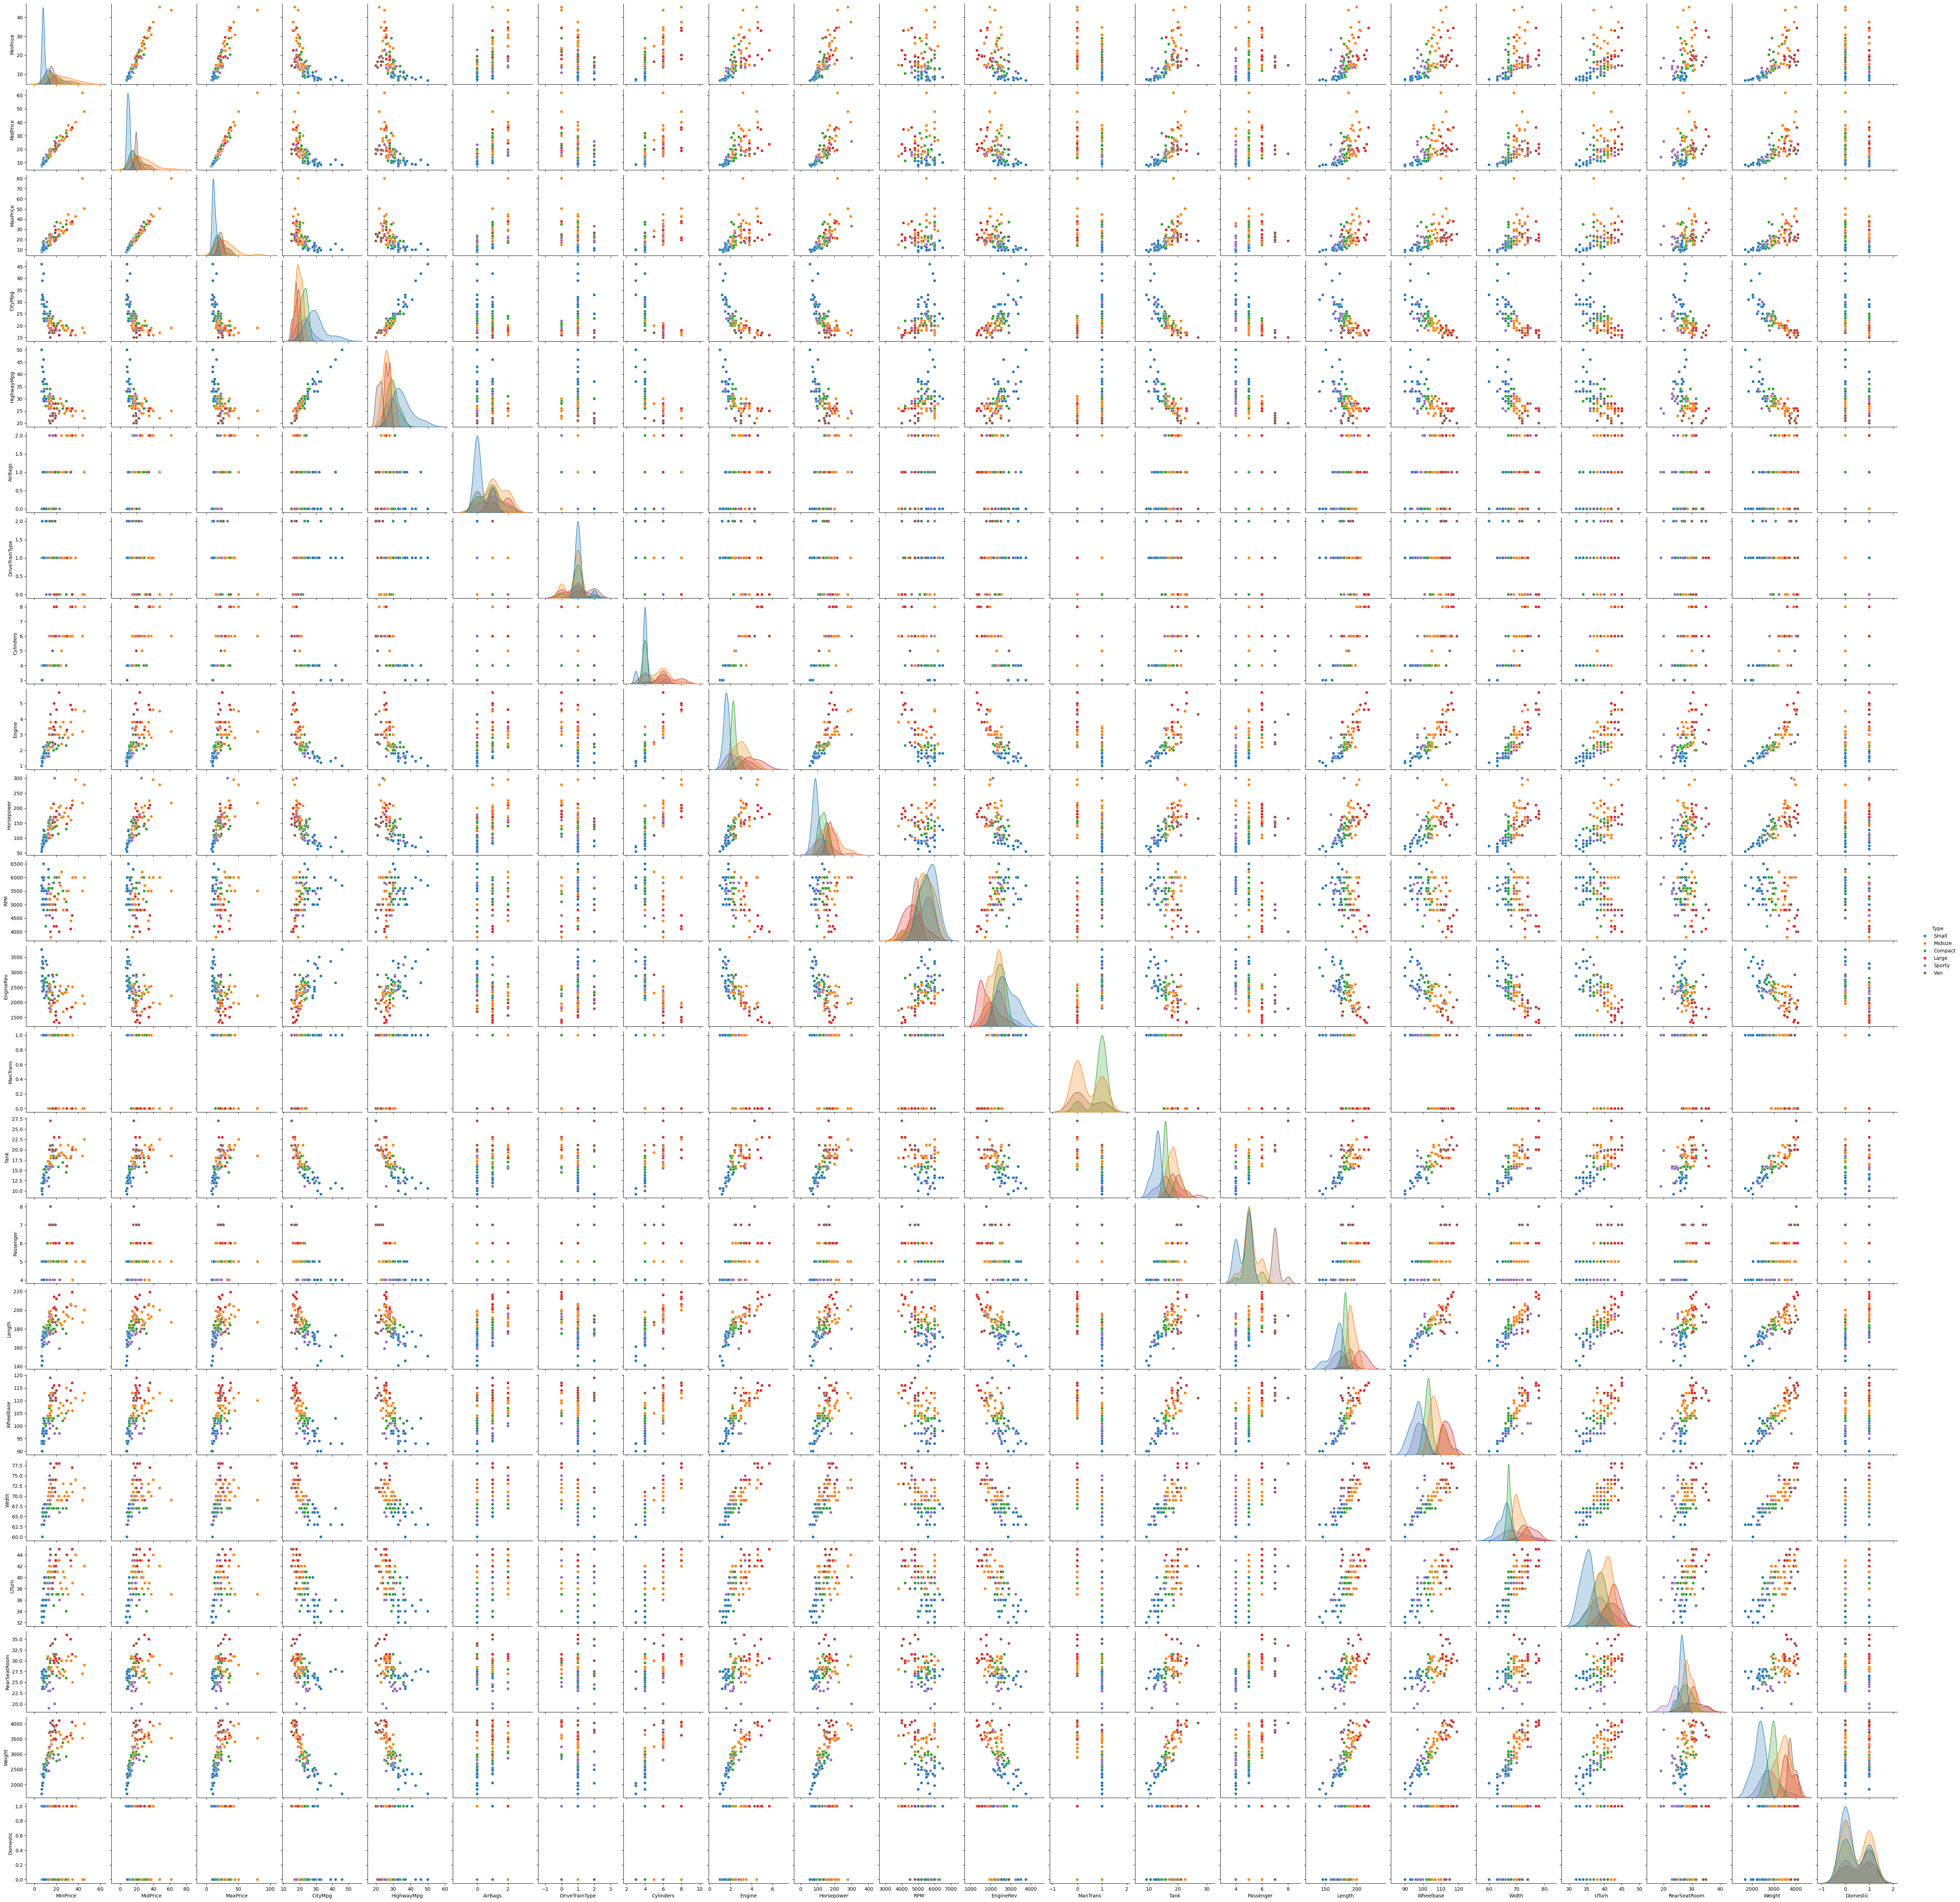

In [54]:
import seaborn as sns
plots = sns.pairplot(cars, hue="Type")
plots.savefig('see.pdf')

<div class="alert alert-info">
    
 **Understand the variables**
</div>

Each car is described by a long list of variables and analyzing them individually and pair-wise will take a long time. I will first reduce the dimensionality of the dataset and then analyze it.



**Explore correlation matrix**

Finding groups of variables that belong together and understand their connection.


In [41]:
corr = cars.corr(method='pearson',numeric_only=True)
variables = list(corr)
# linearize the correlation matrix
lin_corr = pd.melt(corr.assign(index= corr.index), id_vars=['index'])
lin_corr['size'] = [abs(val)*17 for val in lin_corr.value]
lin_corr

index  variable     value       size
0        MinPrice  MinPrice  1.000000  17.000000
1        MidPrice  MinPrice  0.969497  16.481444
2        MaxPrice  MinPrice  0.904767  15.381047
3         CityMpg  MinPrice -0.613667  10.432340
4      HighwayMpg  MinPrice -0.574668   9.769355
..            ...       ...       ...        ...
479         Width  Domestic  0.428959   7.292298
480         UTurn  Domestic  0.480740   8.172585
481  RearSeatRoom  Domestic  0.103606   1.761307
482        Weight  Domestic  0.209338   3.558746
483      Domestic  Domestic  1.000000  17.000000

[484 rows x 4 columns]

<div class = 'alert alert-info'>

The following code renders a correlation matrix using bokeh. For each pair of variables, the correlation is represented by a colored square. Size and color encode the amount of linear correlation. Large red squares indicate strong positive correlation, large blue squares strong negative correlation.

</div>

In [42]:
p = figure(x_range=variables, y_range=variables, width=800, height=700,
           title="Correlation matrix")

p.square(source=lin_corr, x='index', y='variable', size = 'size', color=linear_cmap('value', 'RdYlBu7', -1, 1))

color_bar = ColorBar(color_mapper=LinearColorMapper('RdYlBu5', low=-1, high=1),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

p.xgrid.ticker = FixedTicker(ticks=list(range(1,len(corr))))
p.ygrid.ticker = FixedTicker(ticks=list(range(1,len(corr))))
p.xaxis.major_label_orientation = -pi/4
show(p)

<div class = 'alert alert-info'>  

**Correlation between Dataset**
</div>

**Groups:**  
Engine properties: horsepower, engine, cylinders  
Car Price : MaxPrice, MidPrice, MinPrice  
Lengths: U-turn, Width, Wheelbase, Length  
Speed : HighwayMpg, CityMpg  


**Additional correlations between groups:**  
Engine properties and Turn properties  
Car Size and Turn Properties  
Price and Engine Properties  





<div class="alert alert-info">
    
**Explained variance of PCA**
</div>


In [43]:
var = cars.dtypes[cars.dtypes != 'object'].index
# store standardized data in cars_std
cars_std = StandardScaler().fit_transform(cars[var])
# store PCA in variable pca
pca = PCA( n_components=len(var) ).fit(cars_std)
pca

PCA(n_components=22)

In [44]:
var_exp = pca.explained_variance_ratio_*100
cum_var_exp = np.cumsum(var_exp)
x = ['PC%s' %(i+1) for i in range(len(var))]

source = ColumnDataSource( dict(x=x, var_exp=var_exp, cum_var_exp=cum_var_exp) )

p = figure( width=520, height=400, toolbar_location=None, x_range=x, y_range=(-2,105),
            title="Explained variance of PCA of cars dataset")

p.vbar( source=source, x='x', top='var_exp', width=0.9, bottom=0, legend_label='Explained variance' )

p.circle( x, cum_var_exp, color='orange', size=5, legend_label="Cumulative explained variance")
p.line( x, cum_var_exp, color='orange', line_width=2 )

p.legend.location = (235,155)
p.legend.border_line_color = None
p.xgrid.visible = False
p.yaxis.axis_label = "Explained variance in percent"

show(p)

<div class="alert alert-success">

**Observation**
- 0.8 precent of the data was explained by the first two principal components 
- By the cumulative explained variance, 0.9 percent of our data will be explained by the first 5 principal components.
</div>

<div class="alert alert-info">
    
**Interpreting the projection**
</div>

In [45]:
# project the data and add the labels using the cars' type
pca_cars = pd.DataFrame( pca.transform(cars_std), columns=['PC%i' % (i+1) for i in range(pca.n_components_)])
pca_cars['label'] = cars.Type

# get the different classes in the Type variable
factors = sorted(pca_cars.label.unique())

In [46]:
source = ColumnDataSource(pca_cars)

p = figure( width=600, height=600, y_range=(-4.5,4.8),
            title="Projection onto first two principal components")

p.circle( source=source, x='PC1', y='PC2', size=9, legend_group='label',
          color=factor_cmap('label', palette=Category10[10], factors=factors))
p.xaxis.axis_label = 'PC1' 
p.yaxis.axis_label = 'PC2' 

show(p)

In [49]:
source = ColumnDataSource(pca_cars)

p = figure( width=600, height=600, y_range=(-4.5,4.8),
            title="Projection onto first two principal components")

p.circle( source=source, x='PC1', y='PC2', size=9, legend_group='label',
          color=factor_cmap('label', palette=Category10[10], factors=factors))
p.xaxis.axis_label = 'PC1' 
p.yaxis.axis_label = 'PC2'

for i in range(len(var)):
    p.add_layout(Arrow( end = NormalHead(fill_color = 'lightgray', size = 6, line_color = 'lightgray'),
                       x_start = 0, y_start = 0, line_color = 'lightgray',
                       x_end= pca.components_[0][i]*7, y_end = pca.components_[1][i]*7))
    p.add_layout( Label(x = pca.components_[0][i]*7.1, y = pca.components_[1][i]*7.1, text_font_size = '8pt',
                       text=var[i], background_fill_color = None , text_align = 'left', text_baseline = 'middle'))

show(p)

<div class="alert alert-success">

**Observation**

- The x-axis is the first principal component and it consists of Mpg, Cylinders, Tank, Weight, Engine and Length.  
  The y-axis is the second principal component and it consists of Price, RPM and Passenger.  
  Cars located on the left are most have low MilesPerGallons, large Tanks,Engines (Large Cars, Vans and some Midsize Cars)  
  Cars on the right side of the graph have low Tanks and Cylinders and are mostly small cars with higher City Mpg and HighwayMpg  
  Cars at the top have low passenger capacity and have high prices (Sporty,Midsize, Compact)  
  Cars at the bottom are low in prices and have a high sitting capacity(Vans, Large Cars)

</div>


**Want to Distinguish small cars from others**

In [48]:
p = figure(width = 600, height = 600,
           title = 'Distinguish small cars')
p.circle(source = cars, x = 'CityMpg', y = 'Weight', size = 9, legend_group = 'Type',
         color = factor_cmap('Type', palette= Category10[10], factors = factors))
p.xaxis.axis_label = 'City MPG'
p.yaxis.axis_label = 'Weight'
show(p)

<div class="alert alert-success">
Small cars have high City MilesPerGallons and are less in weight comparing to the other cars.  
The highest weight of a small car is at most 2800lbs        
</div>

**Distinguishing between Large cars and Vans** 

In [53]:
p = figure(width = 600, height = 600,
           title = 'Distinguish small cars')
p.circle(source = cars, x = 'MaxPrice', y = 'Horsepower', size = 9, legend_group = 'Type',
         color = factor_cmap('Type', palette= Category10[10], factors = factors))
p.xaxis.axis_label = 'MaxPrice'
p.yaxis.axis_label = 'Horsepower'
show(p)

<div class="alert alert-success">
Large cars has higher Horsepower comapared to vans with its lowest Horsepower being around 140.
</div>